In [4]:
import nltk
import spacy
import csv
import os
import re
import pandas
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab 
import numpy

In [7]:
import platform
from tempfile import TemporaryDirectory
from pdf2image import convert_from_path
from tqdm import tqdm
import pytesseract
from PIL import Image
from pathlib import Path

filename = r'19740076600.pdf'
text_file = 'out.txt'

PDF_file = Path(filename)
text_file = Path(text_file)

file_images = []

In [9]:
import time
t1 = time.time()

pdf_pages = convert_from_path(PDF_file, dpi=200)

t2 = time.time()

t2-t1

6.2067649364471436

In [10]:
pdf_pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1695x2200>]

In [12]:
t1 = time.time()

text = "\n"

'''
width, height = pdf_pages[0].size

left = (width - 1100)/2
top = (height - 1650)/2
right = (width + 1560)/2
bottom = (height + 2000)/2
'''

for page in tqdm(pdf_pages):
    
    custom_oem_psm_config = r'--oem 1'

    text += pytesseract.image_to_string(page, config=custom_oem_psm_config) 

    text = re.sub(r'\$\w*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'#', '', text)
    
    text += "\nNEXT PAGE\n"
    
t2 = time.time()

print(t2-t1)

100%|██████████| 8/8 [00:10<00:00,  1.28s/it]

10.209137916564941


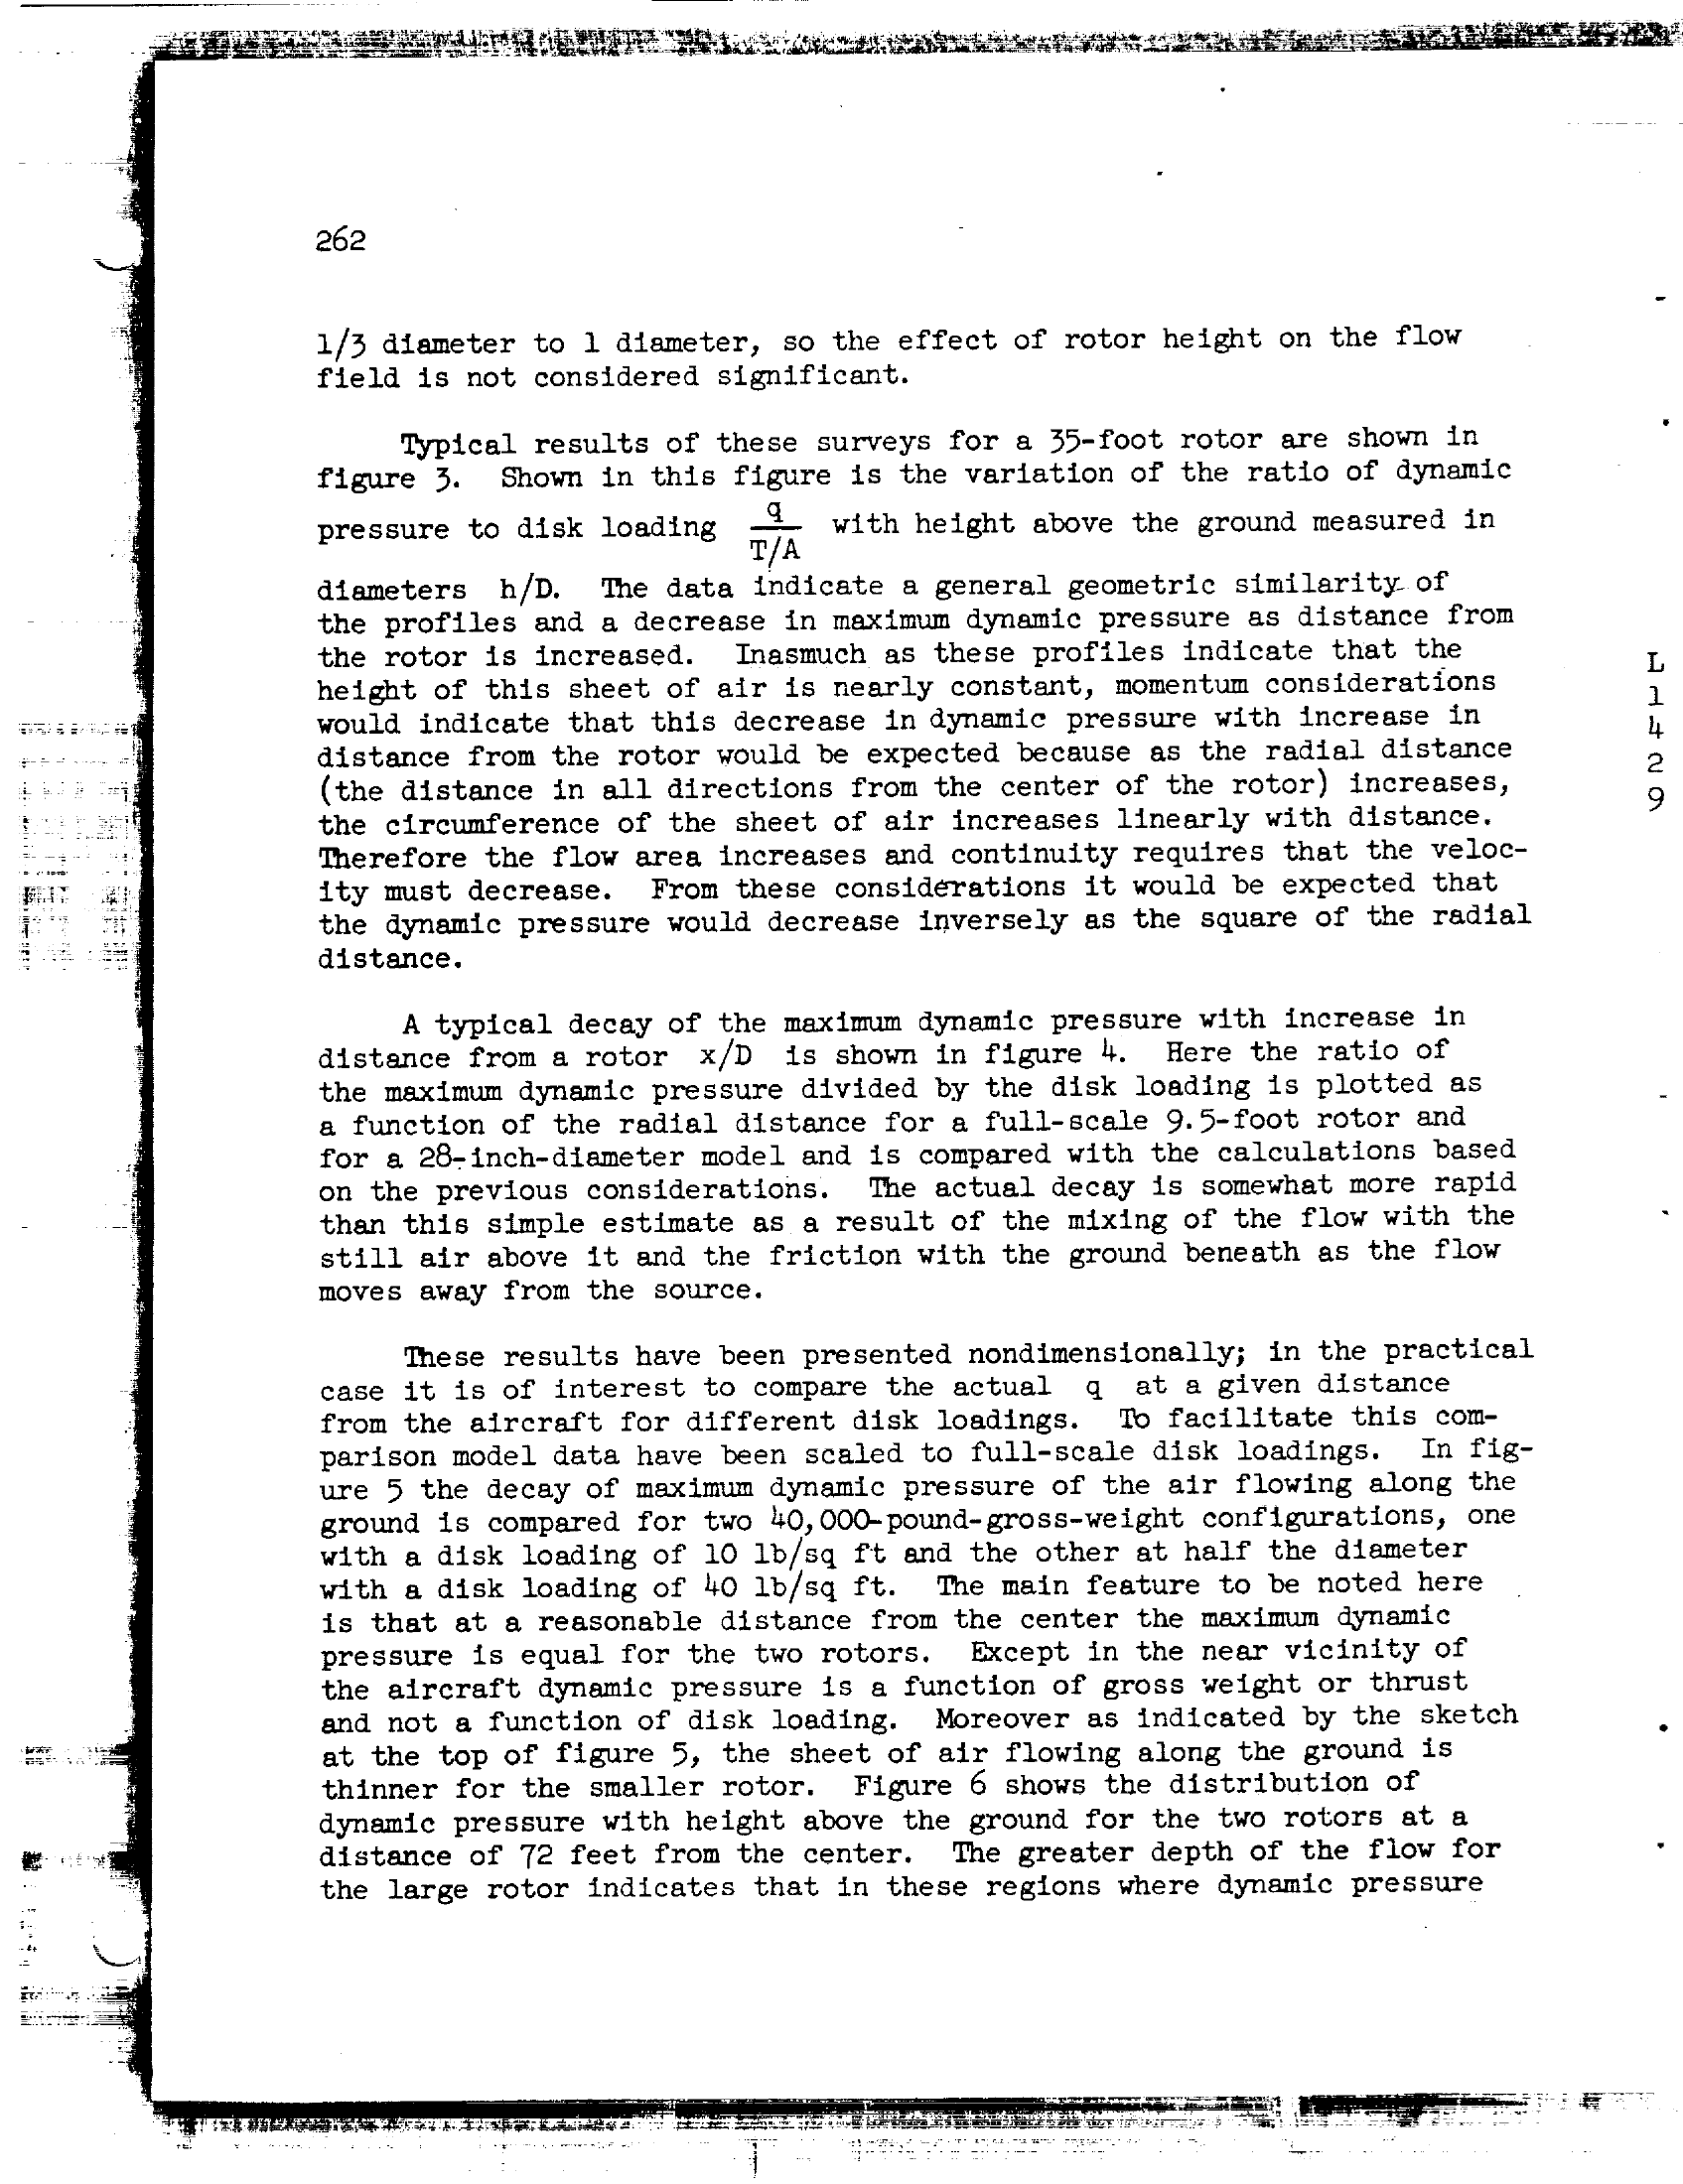

In [13]:
pdf_pages[1]

In [14]:
print(text)


WON FRE

SRE Re BES

Peach eR et

261

CONSIDERATIONS OF THE EFFECT OF VIOL DOWNWASH
ON THE GROUND ENVIRONMENT
By Thomas C. O'Bryan

Langley Research Center

This paper will consider VTOL downwash from the standpoint of
ground erosion and movement of objects to determine the present status
of the downwash problen.

The first problem which will be considered is the erosion effect
of the downwash. Figure 1 indicates the dynamic pressure required to
start erosion for a number of ground surfaces. This information is a
summary of small-scale erosion tests reported in reference 1 except for
the example of loose crushed rock at 19 lb/sq ft. This example was
obtained from an incident with the Vertol VZ-2 operating over an area
covered with loose rock which resulted in damage to the airplane. All
data shown in figure 1 were obtained with the use of cold jets. Since
sod withstands erosion at dynamic pressures up to 1,000 lo/sq ft, opera-
tion of jet VTOL aircraft over this surface would appear 

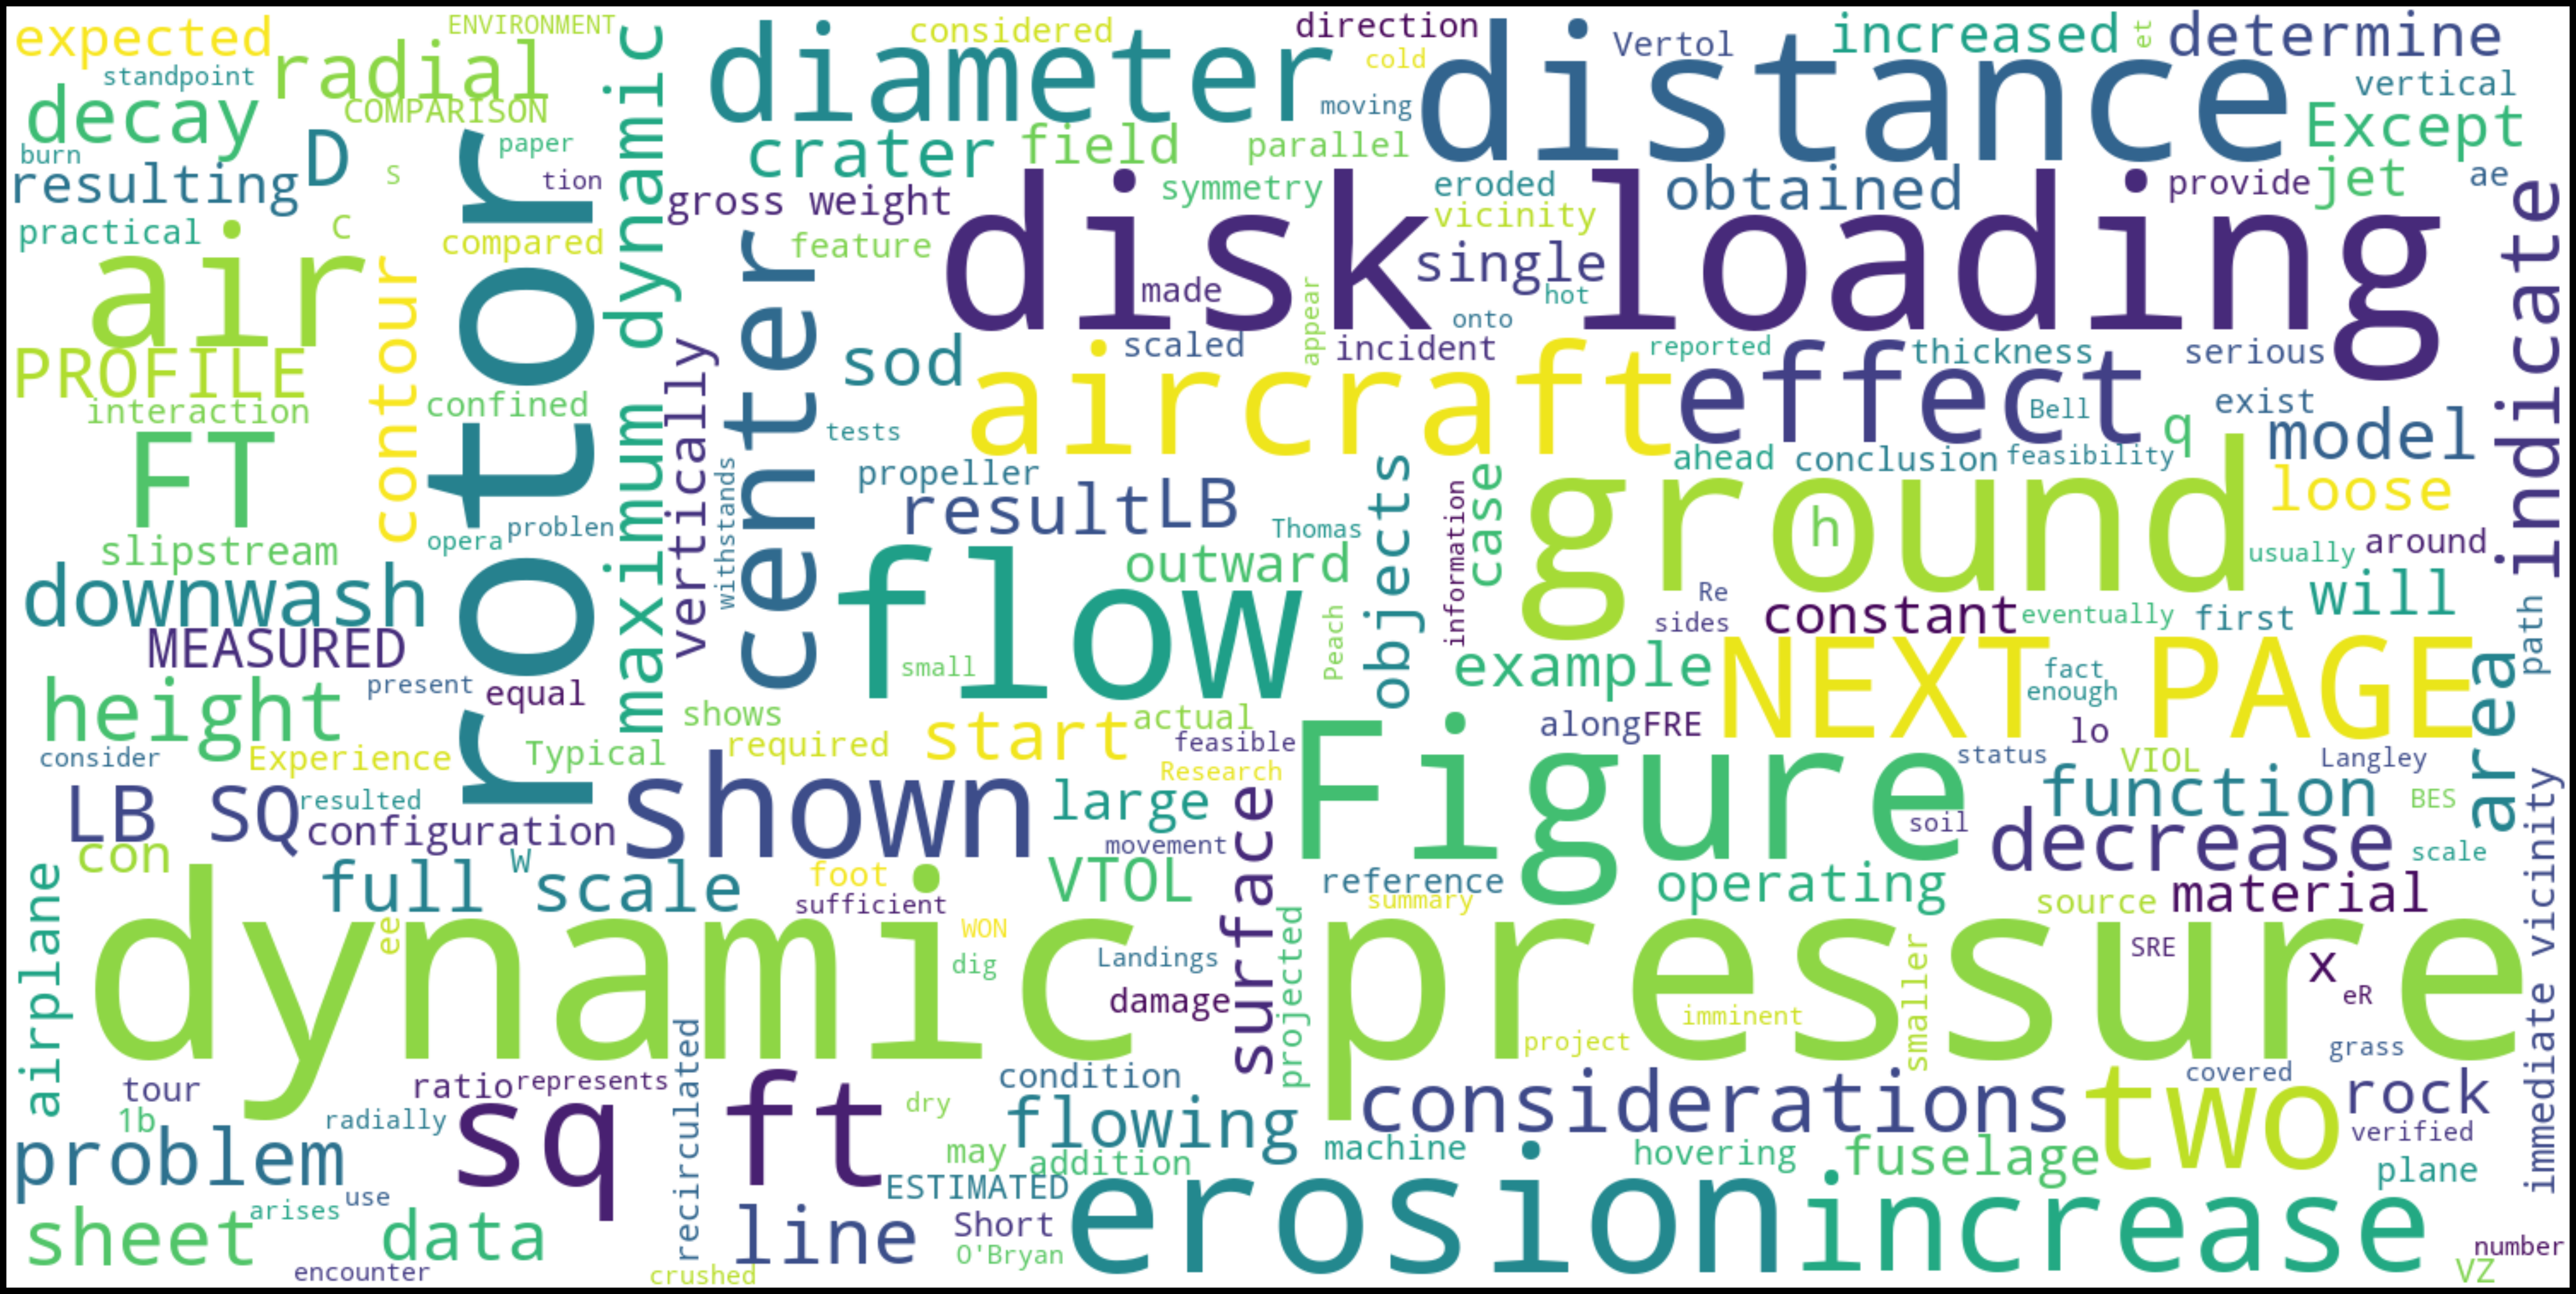

In [15]:
# create a word cloud from the text #
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width = 1500,
    height = 750,
    background_color = 'white',
    stopwords = stopwords
).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k'
)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

[nltk_data] Downloading package punkt to /Users/arnav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


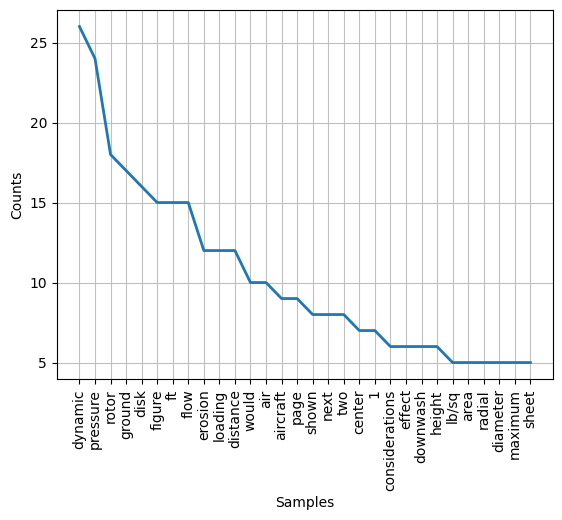

In [16]:
import nltk
import string
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

n_text = text

nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

sents = sent_tokenize(n_text)

words = word_tokenize(n_text)

cl_words = []

for word in words:
    word = word.lower()
    if (word not in stopwords and 
        word not in string.punctuation):
        cl_words.append(word)


from nltk.probability import FreqDist
fdist = FreqDist(cl_words)
fdist

import matplotlib.pyplot as plt

# plot the frequency distribution
fdist.plot(30, cumulative=False)
plt.show()

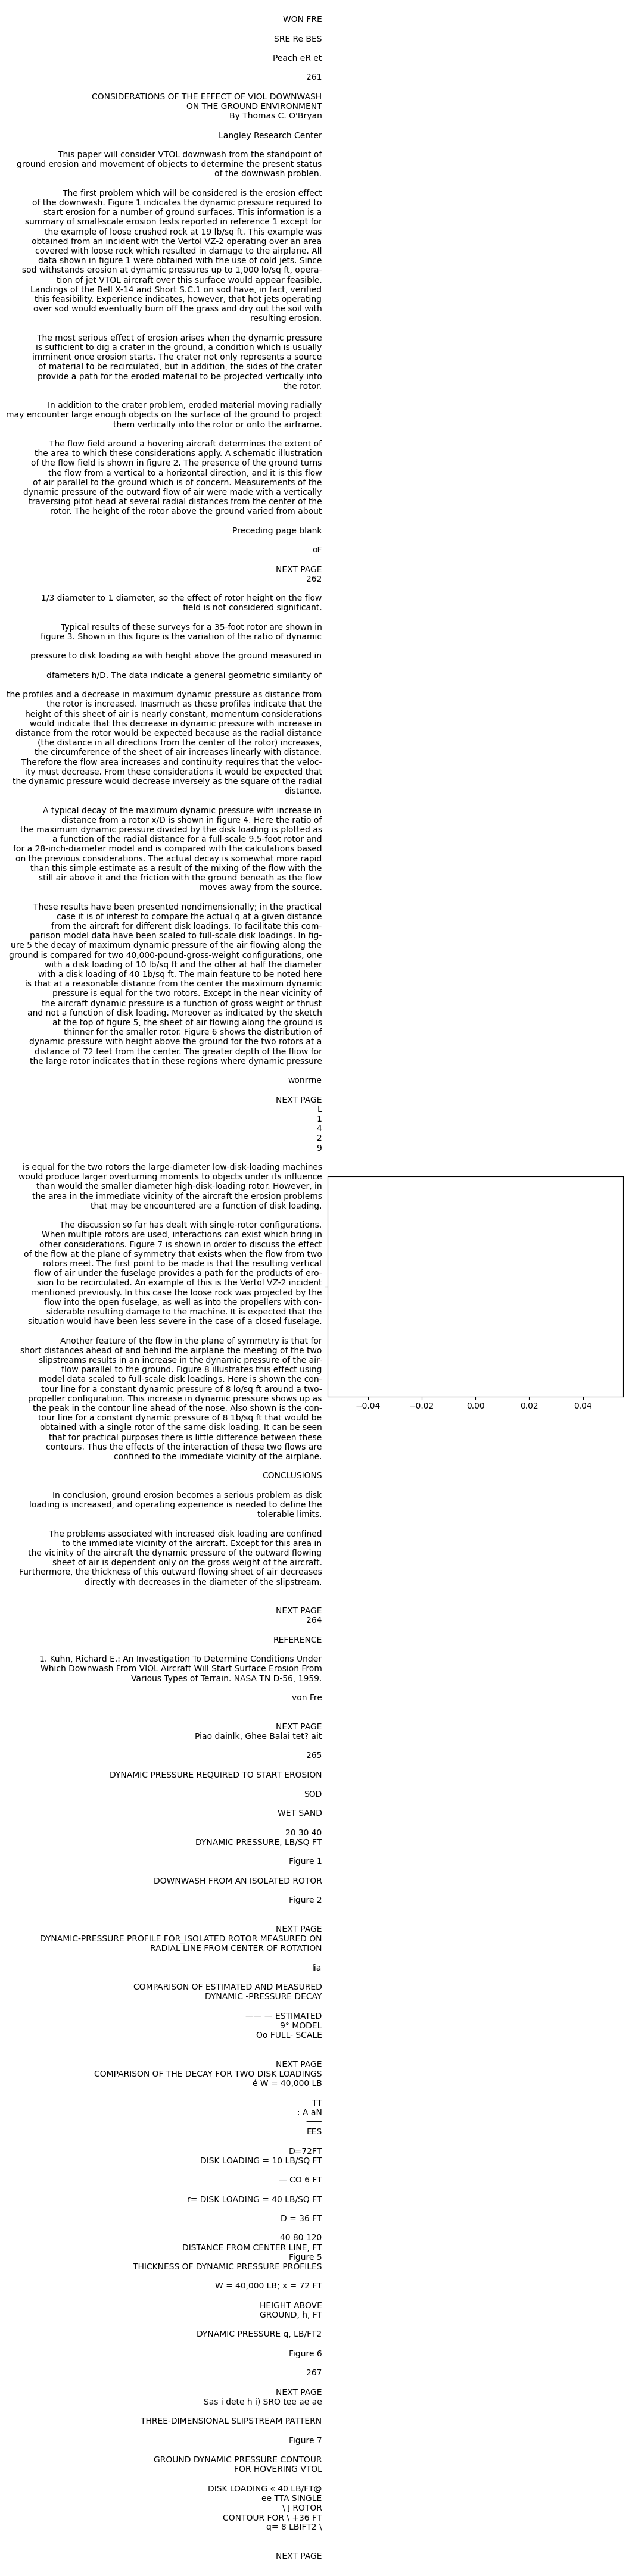

In [17]:
text_file = open(text_file, "w")
 
n = text_file.write(text)
 
text_file.close()

plt.plot(text)